In [16]:
import bnlearn as bn
import pandas as pd

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Plot based on BayesianModel


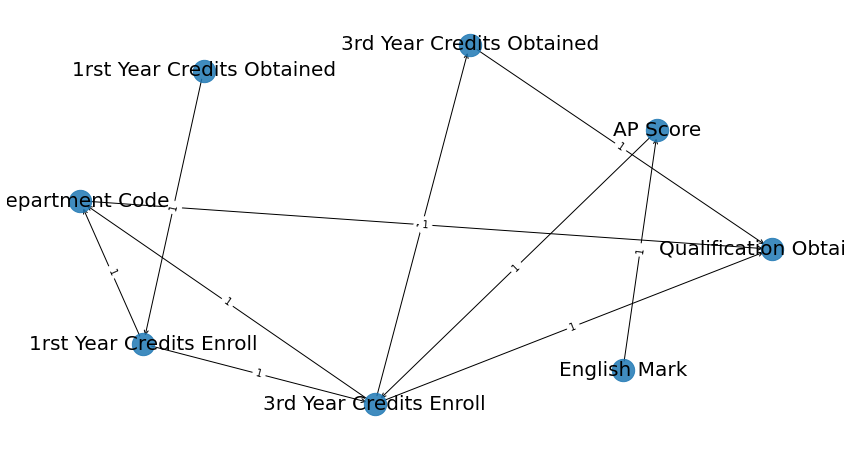

{'pos': {'AP Score': array([0.67973544, 0.50324416]),
  'English Mark': array([ 0.58261072, -0.74611689]),
  'Department Code': array([-0.94209798,  0.13494633]),
  '1rst Year Credits Enroll': array([-0.76394034, -0.61170623]),
  '1rst Year Credits Obtained': array([-0.59471348,  0.81319835]),
  '3rd Year Credits Enroll': array([-0.11414396, -0.92519533]),
  '3rd Year Credits Obtained': array([0.1525496 , 0.94898285]),
  'Qualification Obtained': array([ 1.        , -0.11735324])},
 'G': <networkx.classes.digraph.DiGraph at 0x22d1ae03df0>}

In [17]:
df = pd.read_csv("file path")
df.head()

model = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
#testing two networks

#model = bn.independence_test(model_sl, df, test='chi_square', prune=True)
params_static = {'width':15, 'height':8, 'font_size':14, 'font_family':'times new roman', 'alpha':0.8, 'node_shape':'o', 'facecolor':'white', 'font_color':'#0f0f0f0f'}
#bn.plot(model, params_static)
#model2 = bn.structure_learning.fit(df, methodtype='ex', scoretype='bic')

#bn.compare_networks(model, model2, pos=G['pos'])
bn.plot(model)

Working for n conditional variables: 1:  20%|████████▊                                   | 1/5 [00:00<00:00,  6.10it/s]

[bnlearn] >Computing best DAG using [cs]


Working for n conditional variables: 1:  20%|████████▊                                   | 1/5 [00:00<00:00,  8.78it/s]

Undirected edges:  [('AP Score', 'English Mark'), ('AP Score', 'Department Code'), ('AP Score', '3rd Year Credits Obtained'), ('AP Score', 'Qualification Obtained'), ('English Mark', 'Department Code'), ('English Mark', '3rd Year Credits Obtained'), ('Department Code', '1rst Year Credits Enroll'), ('Department Code', '3rd Year Credits Enroll'), ('Department Code', '3rd Year Credits Obtained'), ('Department Code', 'Qualification Obtained'), ('1rst Year Credits Enroll', '1rst Year Credits Obtained'), ('3rd Year Credits Enroll', '3rd Year Credits Obtained'), ('3rd Year Credits Enroll', 'Qualification Obtained'), ('3rd Year Credits Obtained', 'Qualification Obtained')]
PDAG edges:  [('Qualification Obtained', '3rd Year Credits Obtained'), ('Qualification Obtained', 'Department Code'), ('3rd Year Credits Obtained', '3rd Year Credits Enroll'), ('AP Score', 'Department Code'), ('AP Score', 'Qualification Obtained'), ('AP Score', '3rd Year Credits Obtained'), ('AP Score', 'English Mark'), ('De

Working for n conditional variables: 5: 100%|████████████████████████████████████████████| 5/5 [01:21<00:00, 16.30s/it]


[('Qualification Obtained', '3rd Year Credits Obtained'), ('Qualification Obtained', 'Department Code'), ('3rd Year Credits Obtained', '3rd Year Credits Enroll'), ('AP Score', 'Department Code'), ('AP Score', 'Qualification Obtained'), ('AP Score', '3rd Year Credits Obtained'), ('AP Score', 'English Mark'), ('Department Code', '3rd Year Credits Obtained'), ('English Mark', 'Department Code'), ('English Mark', '3rd Year Credits Obtained'), ('3rd Year Credits Enroll', 'Department Code'), ('3rd Year Credits Enroll', 'Qualification Obtained'), ('1rst Year Credits Enroll', 'Department Code'), ('1rst Year Credits Enroll', '1rst Year Credits Obtained')]
[bnlearn] >Plot based on BayesianModel


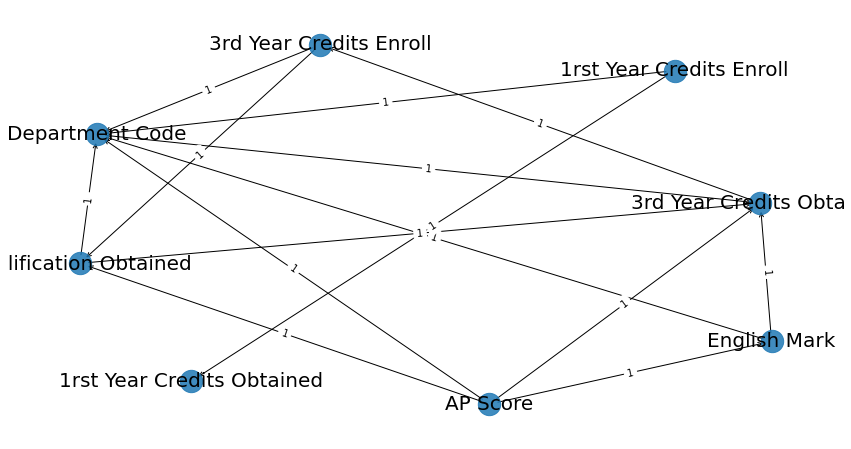

In [3]:
model2 = bn.structure_learning.fit(df, methodtype='cs')

#params_static = {'width':15, 'height':8, 'font_size':14, 'font_family':'times new roman', 'alpha':0.8, 'node_shape':'o', 'facecolor':'white', 'font_color':'#0f0f0f0f'}

G = bn.plot(model2)

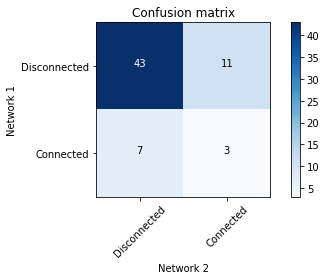

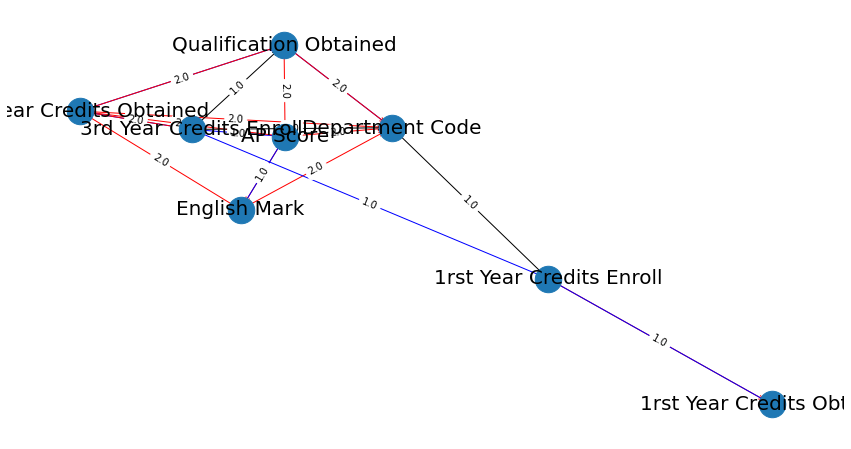

(array([[43, 11],
        [ 7,  3]], dtype=int64),
 target                      AP Score  English Mark  Department Code  \
 source                                                                
 AP Score                           0             2                2   
 English Mark                      -1             0                2   
 Department Code                    0             0                0   
 1rst Year Credits Enroll           0             0                1   
 1rst Year Credits Obtained         0             0                0   
 3rd Year Credits Enroll            0             0                1   
 3rd Year Credits Obtained          0             0                0   
 Qualification Obtained             0             0                2   
 
 target                      1rst Year Credits Enroll  \
 source                                                 
 AP Score                                           0   
 English Mark                                       0   

In [4]:
bn.compare_networks(model, model2)
#G = bn.plot(model, pos=G['pos'])

In [18]:
import matplotlib
import pandas as pd
import numpy as np
import pgmpy

In [19]:
model3 = bn.parameter_learning.fit(model, df)

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
CPD of AP Score:
+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| English Mark      | English Mark(A)     | English Mark(B)     | English Mark(C)     | English Mark(D)     | English Mark(E)     | English Mark(F)     |
+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| AP Score(Average) | 0.12800720442557573 | 0.21575941788707742 | 0.46744727606677816 | 0.5998089780324737  | 0.38144654088050317 | 0.3231638418079096  |
+-------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+
| AP Score(High)    | 0.7856683391226039  | 0.7442203186884038  | 0.45416379677916624 | 0.17946513

In [23]:
model4 = bn.sampling(model3,n =100000)

Generating for node: 1rst Year Credits Enroll:   0%|                                             | 0/8 [00:00<?, ?it/s]

[bnlearn] >Forward sampling for 100000 samples..


Generating for node: Qualification Obtained: 100%|███████████████████████████████████████| 8/8 [00:02<00:00,  3.07it/s]


In [24]:
print(df.head())

  AP Score English Mark  Department Code  1rst Year Credits Enroll  \
0     High            A                7                         0   
1     High            A                7                         0   
2  Average            E                2                         0   
3      Low            D                7                         0   
4      Low            C                7                         0   

   1rst Year Credits Obtained  3rd Year Credits Enroll  \
0                           0                       16   
1                           0                       52   
2                           0                       48   
3                           0                       68   
4                           0                       16   

   3rd Year Credits Obtained Qualification Obtained  
0                         16                    YES  
1                         52                    YES  
2                         48                    YES  
3             

In [25]:
model4.to_csv('testingmodel.csv')

In [79]:
model5.to_csv('BN_synthetic123.csv')